In [61]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.linewidth'] = 3.0

In [62]:
try:
    with open('./dow.txt', 'r') as file:
        data_array = np.genfromtxt(file,delimiter='\n')
except FileNotFoundError:
    print("Error: The file 'dow.txt' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

dow_array = np.zeros(len(data_array))
day_array = np.zeros(len(data_array))

for i in range(len(data_array)):
    dow_array[i]=data_array[i]
    day_array[i]=i

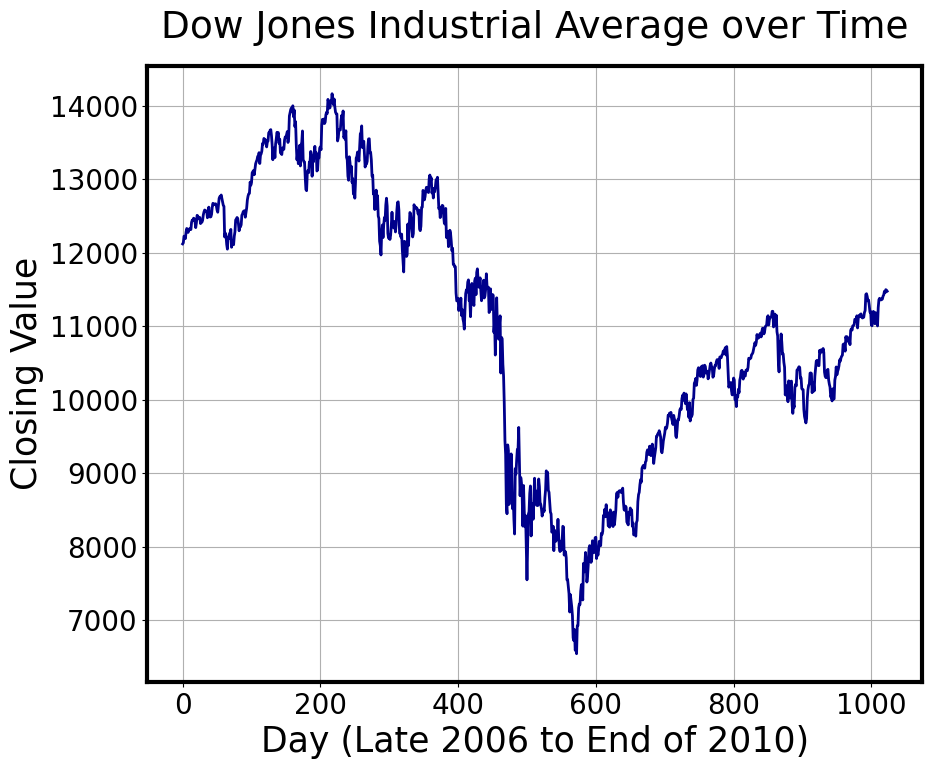

In [65]:
plt.figure(figsize=(10,8),dpi=100)
plt.plot(day_array,dow_array,lw=2,color='darkblue')
plt.xlabel(r'Day (Late 2006 to End of 2010)',fontsize=25)
plt.ylabel(r'Closing Value',fontsize=25)
plt.title(r'Dow Jones Industrial Average over Time',fontsize=27,pad='20')
plt.grid(True,which='both')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params(labelbottom=True)
plt.tick_params(labelleft=True)
plt.savefig('./hw3_p2_dow_jones_plot.png',bbox_inches="tight")
plt.show()

In [66]:
ft_dow = np.fft.rfft(dow_array) # use the 'real' fourier transform, which is relevant since our data here is real, not complex
k_array = np.linspace(0,len(ft_dow)-1,len(ft_dow)) 

percent_to_keep_v1 = 0.1
percent_to_keep_v2 = 0.02

modified_ft_v1 = np.zeros(len(ft_dow),dtype=complex)
cutoff_v1 = int(len(ft_dow)*percent_to_keep_v1)

modified_ft_v2 = np.zeros(len(ft_dow),dtype=complex)
cutoff_v2 = int(len(ft_dow)*percent_to_keep_v2)

for i in range(cutoff_v1):
    modified_ft_v1[i] = ft_dow[i]

for i in range(cutoff_v2):
    modified_ft_v2[i] = ft_dow[i]

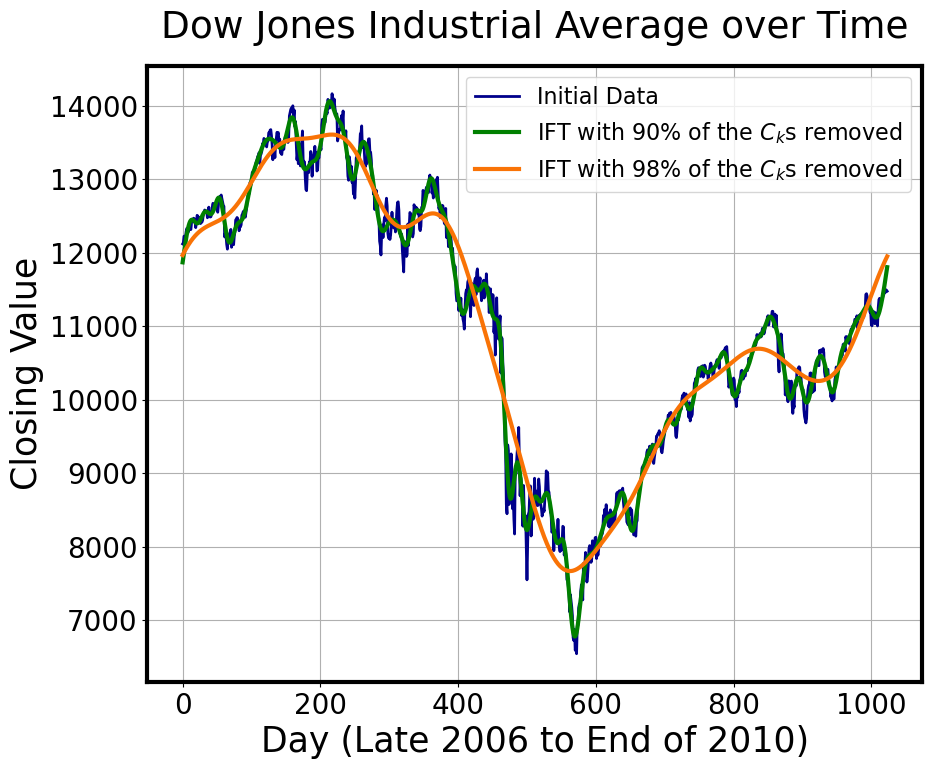

In [67]:
dow_modified_v1 = np.fft.irfft(modified_ft_v1)
dow_modified_v2 = np.fft.irfft(modified_ft_v2)

plt.figure(figsize=(10,8),dpi=100)
plt.plot(day_array,dow_array,lw=2,color='darkblue',label=r'Initial Data')
plt.plot(day_array,dow_modified_v1,lw=3,color='green',label=r'IFT with 90% of the $C_k$s removed')
plt.plot(day_array,dow_modified_v2,lw=3,color='#F97306',label=r'IFT with 98% of the $C_k$s removed')
plt.xlabel(r'Day (Late 2006 to End of 2010)',fontsize=25)
plt.ylabel(r'Closing Value',fontsize=25)
plt.title(r'Dow Jones Industrial Average over Time',fontsize=27,pad='20')
plt.grid(True,which='both')
plt.legend(loc='upper right',fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params(labelbottom=True)
plt.tick_params(labelleft=True)
plt.savefig('./hw3_p2_dow_jones_plus_ifts.png',bbox_inches="tight")
plt.show()